**Author: Ntigkaris E. Alexandros**

*Description:* Demonstrating the inner workings of a neural network, applied on two popular sklearn datasets.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("ggplot")

from warnings import simplefilter
simplefilter("ignore")

from sklearn.datasets import load_iris,load_breast_cancer

from sklearn.linear_model import LogisticRegression
from SNN import SNN

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split

**1. The Iris dataset** *(Multiclass classification)*

In [2]:
df = load_iris()
features = df.data
targets = df.target
scaler = RobustScaler()
scaler.fit(features)
features = scaler.transform(features)

X_train , X_test , y_train , y_test = train_test_split(features,targets,stratify=targets,random_state=0)

n1 = SNN(4,3,hidden_layer=500,learning_rate=1,epochs=300,random_state=0,verbose=True)
n1.fit(X_train,y_train)
print(f"\nAccuracy with neural network: {n1.score(X_test,y_test)}")

r1 = LogisticRegression(penalty='l2',random_state=0)
r1.fit(X_train,y_train)
print(f"\nAccuracy with logistic regression: {r1.score(X_test,y_test)}")

Epoch 1/300:	Calculating...	Error: 0.7807506588711252
Epoch 2/300:	Calculating...	Error: 0.5434819830535887
Epoch 3/300:	Calculating...	Error: 0.41948438961198686
Epoch 4/300:	Calculating...	Error: 0.4153262060387375
Epoch 5/300:	Calculating...	Error: 0.4338146523283062
Epoch 6/300:	Calculating...	Error: 0.34399651508844376
Epoch 7/300:	Calculating...	Error: 0.3797390472615133
Epoch 8/300:	Calculating...	Error: 0.3659722196396571
Epoch 9/300:	Calculating...	Error: 0.3730043245461192
Epoch 10/300:	Calculating...	Error: 0.3770440545728336
Epoch 11/300:	Calculating...	Error: 0.39755304890652327
Epoch 12/300:	Calculating...	Error: 0.35374905418149233
Epoch 13/300:	Calculating...	Error: 0.39783733461399856
Epoch 14/300:	Calculating...	Error: 0.36107014166449813
Epoch 15/300:	Calculating...	Error: 0.4112255379918075
Epoch 16/300:	Calculating...	Error: 0.405672266446693
Epoch 17/300:	Calculating...	Error: 0.4169126102564338
Epoch 18/300:	Calculating...	Error: 0.4532035055849623
Epoch 19/300:	

**2. The Breast Cancer dataset** *(Binary classification)*

In [3]:
df = load_breast_cancer()
features = df.data
targets = df.target
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

X_train , X_test , y_train , y_test = train_test_split(features,targets,stratify=targets,random_state=0)

n2 = SNN(30,2,hidden_layer=800,learning_rate=.1,epochs=200,random_state=0,verbose=True,error_type="ESS")
n2.fit(X_train,y_train)
print(f"\nAccuracy with neural network: {n2.score(X_test,y_test)}")

r2 = LogisticRegression(penalty='none',random_state=0)
r2.fit(X_train,y_train)
print(f"\nAccuracy with logistic regression: {r2.score(X_test,y_test)}")

Epoch 1/200:	Calculating...	Error: 62.19106277685339
Epoch 2/200:	Calculating...	Error: 16.738032590559182
Epoch 3/200:	Calculating...	Error: 14.561428344669185
Epoch 4/200:	Calculating...	Error: 11.933122090864511
Epoch 5/200:	Calculating...	Error: 10.378524391215391
Epoch 6/200:	Calculating...	Error: 11.159525362951037
Epoch 7/200:	Calculating...	Error: 10.762540255826819
Epoch 8/200:	Calculating...	Error: 9.396389358666887
Epoch 9/200:	Calculating...	Error: 8.876101131221631
Epoch 10/200:	Calculating...	Error: 9.537469580971232
Epoch 11/200:	Calculating...	Error: 9.479517583929438
Epoch 12/200:	Calculating...	Error: 9.634112538668191
Epoch 13/200:	Calculating...	Error: 8.969814176730708
Epoch 14/200:	Calculating...	Error: 8.561834852891124
Epoch 15/200:	Calculating...	Error: 9.800884215196547
Epoch 16/200:	Calculating...	Error: 9.274809307344768
Epoch 17/200:	Calculating...	Error: 8.773905245678442
Epoch 18/200:	Calculating...	Error: 8.04208118699761
Epoch 19/200:	Calculating...	Err

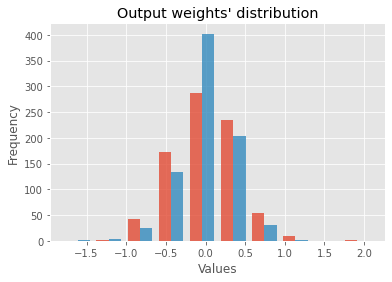

----------------------------------------
Epochs performed: 200
Final error ('ESS'): 0.17558885254965542
Input nodes used: 30
Hidden nodes used: 800
Output nodes used: 2
Activation function: 'sigmoid'
Algorithm's learning rate: 0.1
----------------------------------------


In [4]:
n2._diagnostics()